In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Cópia do DataFrame

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


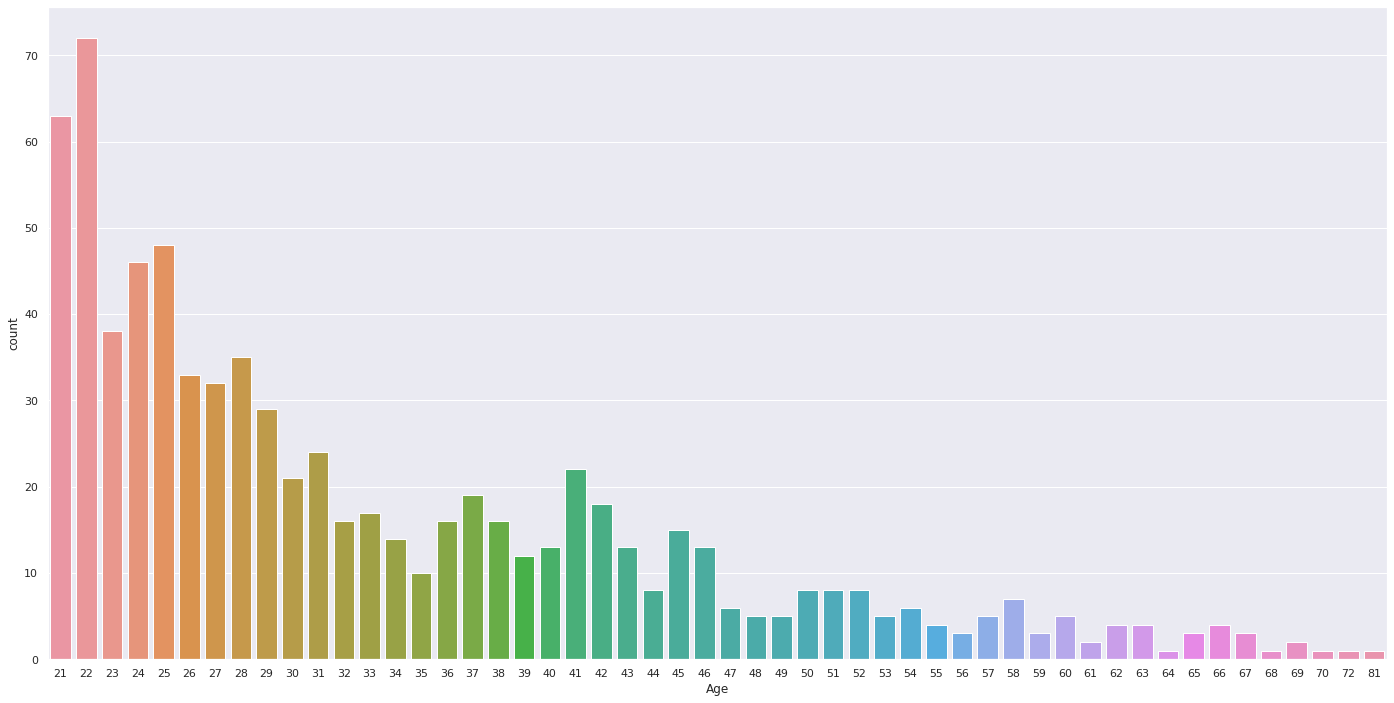

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(24, 12))
ax = sns.countplot(x = 'Age', data=df1)
plt.show()

In [ ]:
df1.loc[:].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


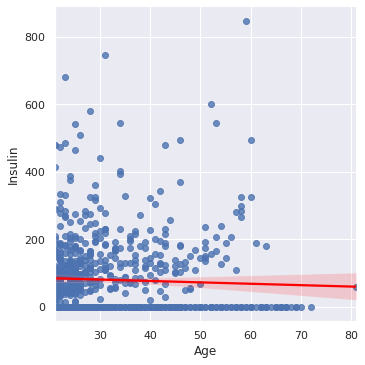

In [ ]:
sns.lmplot(data=df1, x='Age', y='Insulin', line_kws={'color': 'red'})

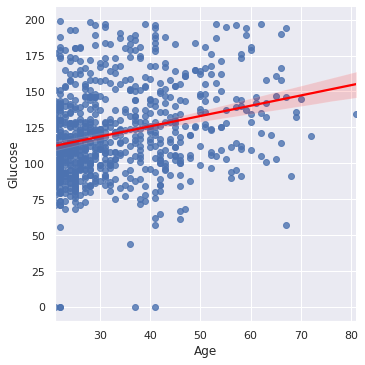

In [ ]:
sns.lmplot(data=df1, x='Age', y='Glucose', line_kws={'color': 'red'})

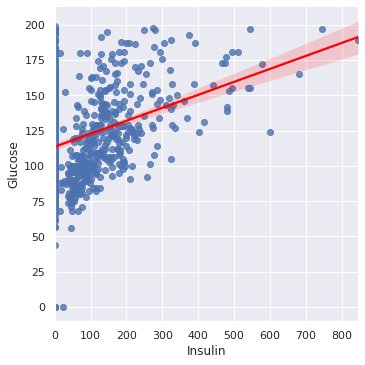

In [ ]:
sns.lmplot(data=df1, x='Insulin', y='Glucose', line_kws={'color': 'red'})

In [ ]:
idade=df1['Age']
pregnan=df1['Pregnancies']

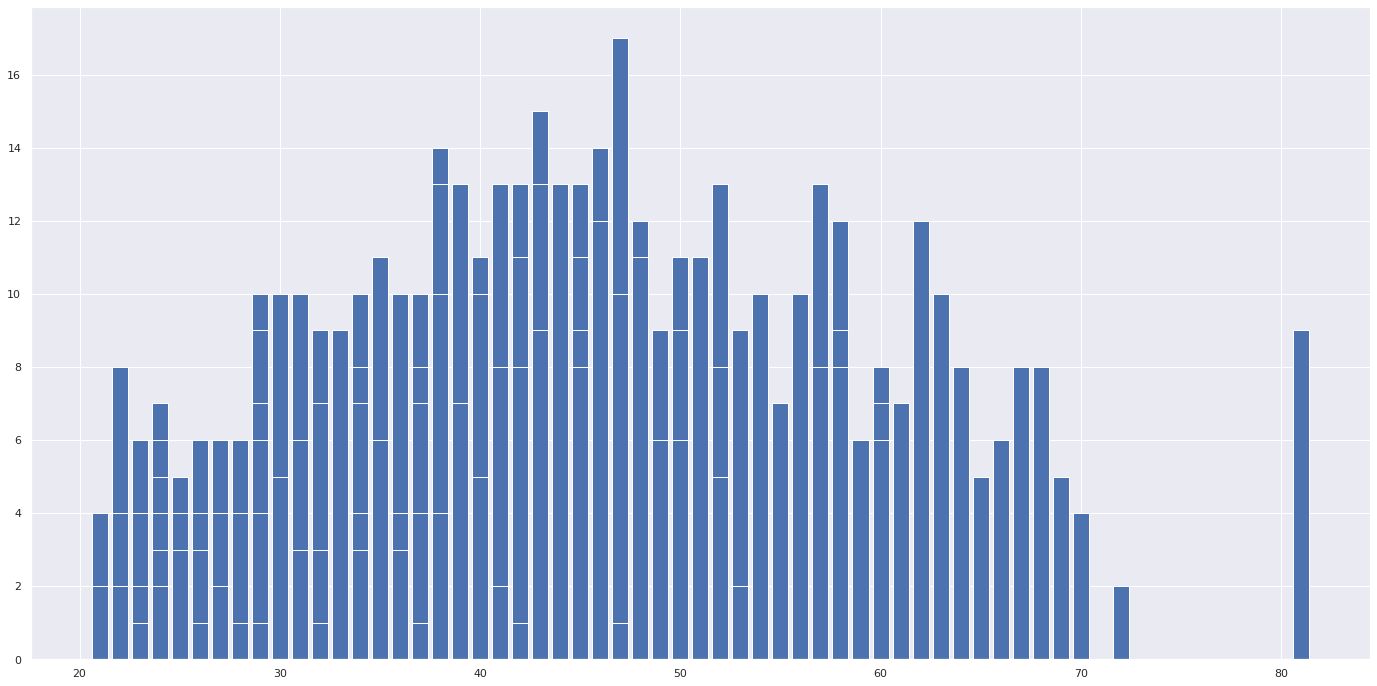

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(24,12))
plt.bar(idade, pregnan)
plt.ylabel=df1['Pregnancies']
plt.xlabel=df1['Age']
plt.show()

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import seaborn as sns

# Colunas de entrada e saída (X e Y)

In [ ]:
x=df1.drop('Outcome',axis=1)
y=df1.loc[:,'Outcome']

In [ ]:
modelo=DecisionTreeClassifier(max_depth=4)

In [ ]:
modelo.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Linhas a serem previstas

In [ ]:
novo_caso_0=df1.iloc[[0],:].drop('Outcome', axis=1)

In [ ]:
print(modelo.predict(novo_caso_0))

[1]


In [ ]:
novo=df1.iloc[0:8].drop('Outcome', axis=1)

In [ ]:
print(modelo.predict(novo))

[1 0 1 0 1 0 0 0]


**Comparação - Previsão vs. Resultado**

In [ ]:
df['Outcome'].head(8)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
Name: Outcome, dtype: int64

In [ ]:
df.iloc[0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


[]

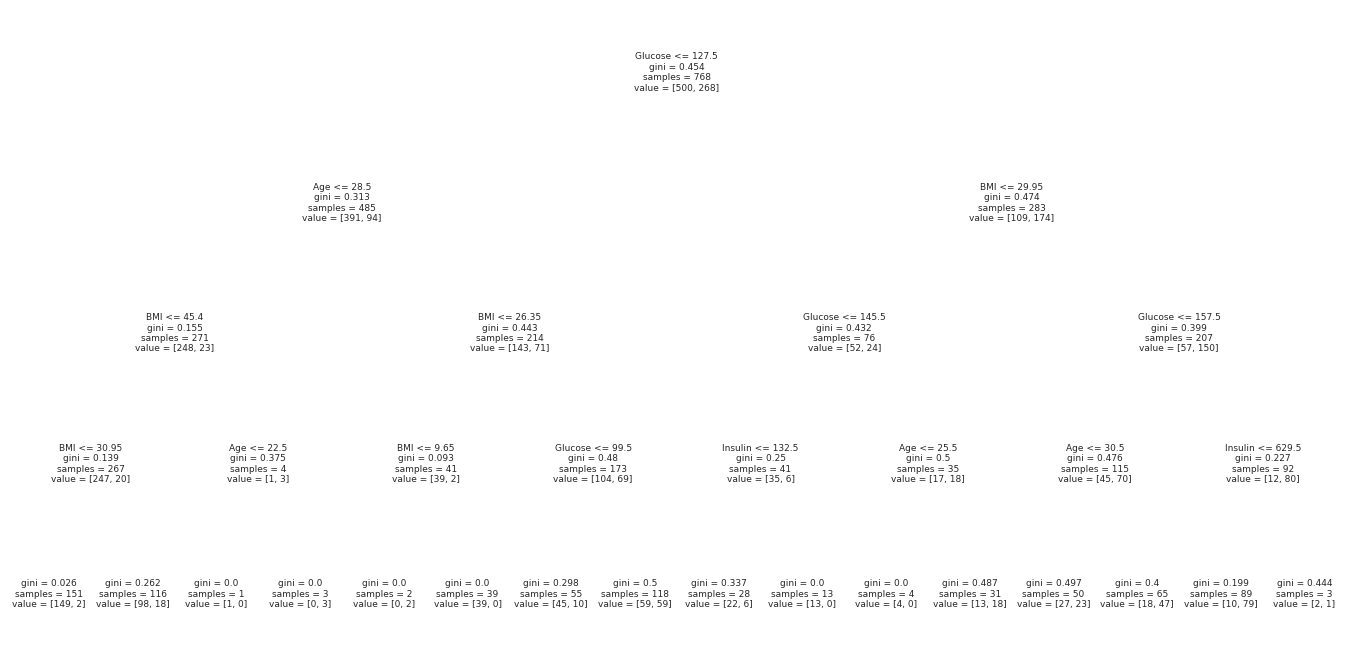

In [ ]:
fig, ax=plt.subplots(1, 1, figsize=(24,12))

plot_tree(modelo,feature_names=x.columns, fontsize=9,ax=ax)

plt.plot()

# FEEDBACK

import pandas as pd <BR>
from sklearn.tree import DecisionTreeClassifier, plot_tree<BR>
import matplotlib.pyplot as plt<BR><BR>

%matplotlib inline<BR><BR>

df = pd.read_csv('datasets/diabetes.csv')<BR><BR>

df.head()<BR><BR>

x = df.drop('Outcome', axis=1)<BR>
y = df['Outcome']<BR><BR>

modelo = DecisionTreeClassifier(max_depth=4)<BR>
modelo.fit(x, y)<BR>

testar = x[:7]<BR>

print(modelo.predict(testar))<BR>
print(y[:7].values)<BR>


In [ ]:
y_predict=modelo.predict(x)

In [ ]:
y_predict.shape,x.shape

((768,), (768, 8))

In [ ]:
from sklearn.metrics import  accuracy_score

In [ ]:
accuracy_score(y,y_predict)

0.7916666666666666

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino,x_teste,y_treino,y_teste= train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=modelo.predict(x_teste)

In [ ]:
accuracy_score(y_teste,y_pred)

0.7402597402597403

# CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score= cross_val_score(modelo,x,y,cv=5)
print(cv_score)
print('Acurácia Média: ',cv_score.mean())

[0.73376623 0.68181818 0.74025974 0.77124183 0.73202614]
Acurácia Média:  0.731822425940073


# GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid={'max_depth':list(range(1,10))}
modelo_gscv=GridSearchCV(modelo,params_grid,cv=5)
modelo_gscv.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             

In [ ]:
modelo_gscv.best_params_

{'max_depth': 5}

In [ ]:
modelo_gscv.best_score_

0.7474662592309651